In [92]:
import ingestion
import people_library
import retrieval
import os
import pickle
import matplotlib.pyplot as plt
import math
import utils

100%|██████████| 128/128 [02:02<00:00,  1.04it/s]

img path index: 0


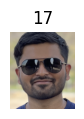

img path index: 1


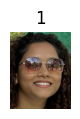

img path index: 2


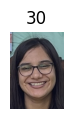

img path index: 3


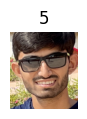

img path index: 4


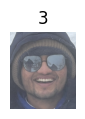

img path index: 5


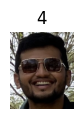

img path index: 6


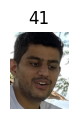

img path index: 7


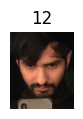

img path index: 8


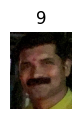

img path index: 9


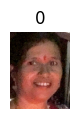

img path index: 10


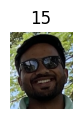

img path index: 11


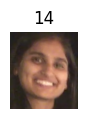

img path index: 12


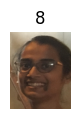

img path index: 13


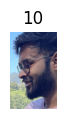

img path index: 14


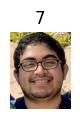

img path index: 15


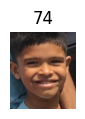

img path index: 16


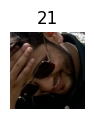

img path index: 17


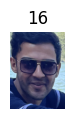

img path index: 18


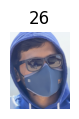

img path index: 19


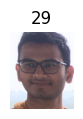

In [65]:
plist = ingestion.__main__()

In [101]:
# Name  and write faces here
people = people_library.PeopleLibrary()
people.rename_face(plist[0]['label'], 'Aditya')
people.rename_face(plist[1]['label'], 'Shruti')
people.rename_face(plist[2]['label'], 'Namita')
people.rename_face(plist[3]['label'], 'Jinay')
people.rename_face(plist[4]['label'], 'Yash')
people.rename_face(plist[5]['label'], 'Yash')
people.rename_face(plist[7]['label'], 'Pratik')
people.rename_face(plist[15]['label'], 'Dhruv')
people.rename_face(plist[11]['label'], 'Aishwarya')
people.rename_face(plist[12]['label'], 'Sayali')
people.rename_face(plist[19]['label'], 'Shubham')

# adding names to faces
people.write_out()


No location or people found. Doing semantic search via CLIP...
[101  50  24 114  45   5   6  58 108  88]


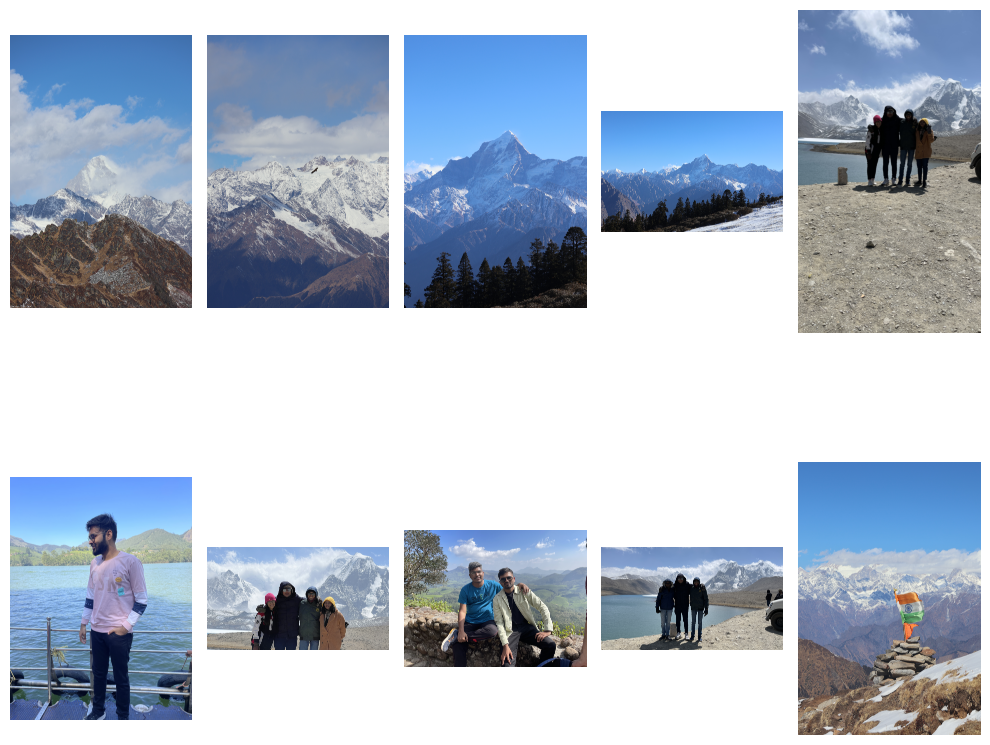

In [116]:
# Retrieval and plot

img_indices = retrieval.__main__(query="Mountains")
print(img_indices)

embed_dir = 'embed_store'
img_path_index = pickle.load(open(os.path.join(embed_dir, 'img_path_index.pkl'), 'rb'))

filtered_images = [img_path_index[idx] for idx in img_indices if idx != -1]

# print(filtered_images)
# display
num_images = len(filtered_images)
rows = math.ceil(num_images / 5)

fig, axes = plt.subplots(rows, 5, figsize=(10, 5 * rows))
if rows == 1:
    axes = [axes] # Handle the case where there's only one row

for i, img_path in enumerate(filtered_images):
    row = i // 5
    col = i % 5
    img = utils.get_and_orient_image(img_path)
    axes[row][col].imshow(img)
    axes[row][col].axis('off')

# Hide any unused subplots in the last row
if num_images % 5 != 0:
    num_empty = 5 - (num_images % 5)
    for i in range(num_empty):
        fig.delaxes(axes[-1][-1 - i])

plt.tight_layout()
plt.show()